# Лабораторная работа №5(Ким Д.В., группа БПМ-151)

## РЕШЕНИЕ  СИСТЕМ  ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ИТЕРАЦИОННЫМИ МЕТОДАМИ 


### Вариант 13

### Задача 1

Дана  система уравнений  $Ax = b$. Найти решение  системы  с помощью метода Гаусса. Выполнить $10$ итераций по методу Зейделя. Принимая решение,  полученное с помощью метода Гаусса  за точное, найти величину абсолютной погрешности итерационного решения. 
$A =  \begin{bmatrix}
   2.97 & 0.4 & 0.3 & 1.98 & 0 & 0.1 \\    
   0.99 & 4.9 & 0.4 & 2.97 & 0.2 & -0.3 \\
   0 & -1.8 & 6.6 & 3.3 & 0.6 & 0.8 \\
   4.95 & 1.6 & 1.2 & 8.91 & 0.8 & 0.3 \\
   1.98 & -1.5 & 0.4 & -1.98 & 6.1 & 0 \\
   9.9 & 1.4 & 2.4 & 5.94 & 3.2 & 23.3       
   \end{bmatrix}
$

$ b =\begin{bmatrix}
4.69 \\
12.18 \\
-3.64 \\
21.05 \\
0.42 \\
-13.91
\end{bmatrix}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lnl
from copy import deepcopy

import time
from tqdm import *

%matplotlib inline 

In [2]:
A = np.array([[2.97, 0.4, 0.3, 1.98, 0, 0.1], 
              [0.99, 4.9, 0.4, 2.97, 0.2, -0.3], 
              [0, -1.8, 6.6, 3.3, 0.6, 0.8], 
              [4.95, 1.6, 1.2, 8.91, 0.8, 0.3], 
              [1.98, -1.5, 0.4, -1.98, 6.1, 0], 
              [9.9, 1.4, 2.4, 5.94, 3.2, 23.3]])
b = np.array([[-73.34],
              [-37.456],
              [-126.316],
              [-82.528],
              [96.66],
              [7.41]])
print(A)
print(b)
print(A.shape, b.shape)

[[ 2.97  0.4   0.3   1.98  0.    0.1 ]
 [ 0.99  4.9   0.4   2.97  0.2  -0.3 ]
 [ 0.   -1.8   6.6   3.3   0.6   0.8 ]
 [ 4.95  1.6   1.2   8.91  0.8   0.3 ]
 [ 1.98 -1.5   0.4  -1.98  6.1   0.  ]
 [ 9.9   1.4   2.4   5.94  3.2  23.3 ]]
[[ -73.34 ]
 [ -37.456]
 [-126.316]
 [ -82.528]
 [  96.66 ]
 [   7.41 ]]
(6, 6) (6, 1)


In [3]:
def draw_matrix(_A, ax, precision = 10):
    
    res = ax.imshow(np.array(_A), cmap=plt.cm.Pastel1_r, interpolation='nearest')

    width, height = _A.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(_A[x, y])[:precision], xy=(y, x), horizontalalignment='center', verticalalignment='center')

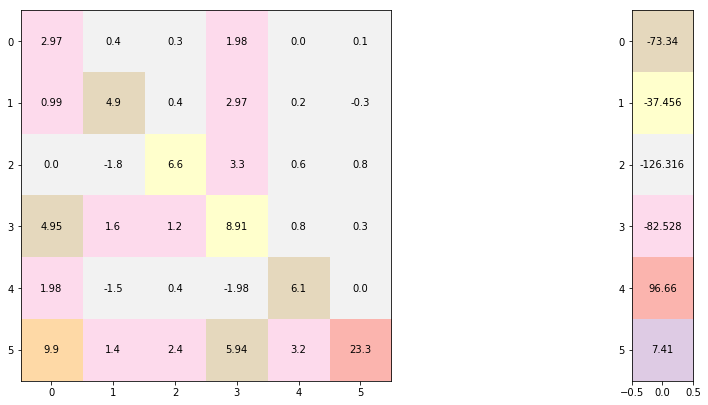

In [4]:
fig = plt.figure(figsize=(15, 15))

# отобразим матрицу А
ax = fig.add_subplot(221)

draw_matrix(A, ax, precision=17)
    
ax = fig.add_subplot(222)

# отображаем вектор b
draw_matrix(b, ax)

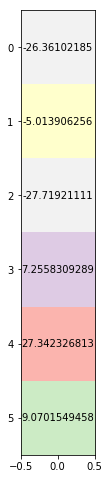

In [5]:
x_true = lnl.solve(A, b)
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(222)

draw_matrix(x_true, ax, precision = 12)

**Преобразуем систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций.** <br/>
Как говорит нам учебник Амосова: <br/>
"Для того чтобы применить метод простой итерации к решению СЛАУ $ Ax = b$ с квадратной невырожденной матрицей $A$ необходимо преобразовать систему к виду: $$\large x = Bx + c\qquad (1)$$
где $\large B$ - квадратная матрица с элементами $\large b_{i, j}, i, j = 1, ... , n$,

$\large c$ - вектор-столбец с элементами $\large c_{i}, i = 1, ..., n$

В развернутой форме система (1) примет вид:

$$\large x_{1} = b_{1,1}x_{1} + b_{1,2}x_{2} + b_{1,3}x_{3} + ... + b_{1, n}x_{n} + c_{1},$$$$\large x_{2} = b_{2,1}x_{1} + b_{2,2}x_{2} + b_{2,3}x_{3} + ... + b_{2, n}x_{n} + c_{2},$$$$\large \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \quad \dotsb$$$$\large x_{n} = b_{n,1}x_{1} + b_{n,2}x_{2} + b_{n,3}x_{3} + ... + b_{n, n}x_{n} + c_{n},$$
Вообще говоря данная операция приведения к виду удобному для итераций не является простой и требует специальных знаний о специфике системы.
Самый простой способ состоит в следующем:

$\large x_{1} = a_{1,1}^{-1}(b_{1} - a_{1,2}x_{1} - a_{1,3}x_{2} - a_{1,3}x_{3} - ... - a_{1,n}x_{n})$ - из первого уравнения системы выражаем $x_{1}$,

$\large x_{2} = a_{2,2}^{-1}(b_{2} - a_{2,1}x_{1} - a_{2,3}x_{2} - a_{3,3}x_{3} - ... - a_{3,n}x_{n})$ - из первого уравнения системы выражаем $x_{3}$,

Продолжаем выражать корни и получаем систему:

$$\large x_{1} = \qquad\quad b_{1,2}x_{2} + b_{1,3}x_{3} + \dotsb + b_{1, n}x_{n} + c_{1},$$$$\large x_{2} = b_{2,1}x_{1} + \qquad\quad b_{2,3}x_{3} + \dotsb + b_{2, n}x_{n} + c_{2},$$$$\large x_{3} = b_{3,1}x_{1} + b_{3,2}x_{2}  \qquad\quad + \dotsb + b_{2, n}x_{n} + c_{2},$$
$\qquad\qquad \qquad\qquad \qquad\qquad \qquad\qquad  \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \qquad\qquad \qquad\qquad (2) $ $$\large x_{n} = b_{n,1}x_{1} + b_{n,2}x_{2} + b_{n,3}x_{3} + \dotsb \qquad\quad +c_{n},$$ в которой на главной диагонали стоят нулевые элементы.Остальные выражаются по формулам: $\large b_{i, j} = \frac{-a_{i, j}}{a_{i, i}}, c_{i} = \frac{b_{i}}{a_{i, i}}, \quad i,j = 1, ..., n, i\neq j  \quad\quad (3)$

Конечно для выполнения данного преобразования необходимо, чтобы диагональные элементы матрицы $А$ были не нулевыми".

In [6]:
c = np.zeros_like(b)
B1 = np.zeros((6, 6))
B2 = np.zeros((6, 6))

In [7]:
for i in range(A.shape[0]):
        B1[i, :i] = A[i, :i]/A[i, i]
        B2[i, i+1:] += A[i, i+1:]/A[i, i]
        c[i] = b[i]/A[i, i]

B1


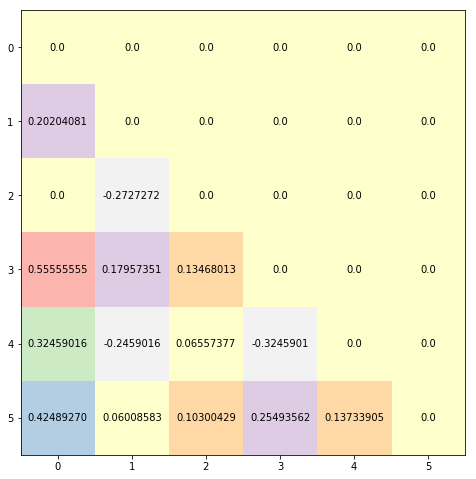

In [8]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(222)
draw_matrix(B1, ax)
print('B1')

B2


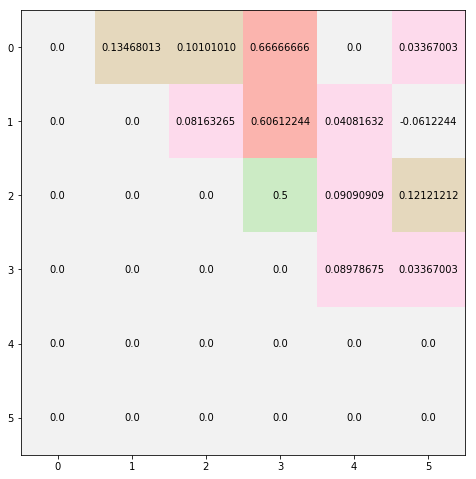

In [9]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(221)
draw_matrix(B2, ax)
print('B2')

c


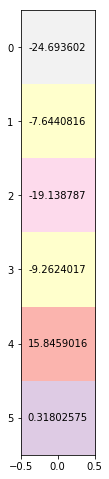

In [10]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(212)
draw_matrix(c, ax)
print('c')

Теперь следует проверить выполнение достаточного условия сходимости итерационных методов: 
<h1><center>$||B||_{\infty} < 1$</center></h1>

In [11]:
B_norm = lnl.norm(B1+B2, ord=np.inf)
print(B_norm < 1)

True


#### Определим функцию, реализующую метод Гаусса-Зейделя.

In [19]:
def gase(B, c, x, limit, eps=0):
    for it_count in range(1, limit):
        x_new = np.zeros_like(x)
        print("Итерация {0}: {1}".format(it_count, x))
        for i in range(B.shape[0]):
            s1 = np.dot(B[i, :i], x_new[:i])
            s2 = np.dot(B[i, i + 1:], x[i + 1:])
            x_new[i] = (c[i] - s1 - s2)
        x = x_new
    return x

        #ps2 = ((1 - lnl.norm(B, ord=np.inf))*eps)/lnl.norm(B2, ord=np.inf)
        #f (lnl.norm((x_new[it] - x), ord=2) < eps2):
         #  print('Выполнен критерий остановки!')
          # return x_new

In [21]:
x = np.zeros_like(c)
B = B1 + B2
x_10 = gase(B, c, x, 10)

Итерация 1: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Итерация 2: [[-24.69360269]
 [ -2.65496599]
 [-19.86286951]
 [  7.60816188]
 [ 26.98035945]
 [  7.37059545]]
Итерация 3: [[-27.64995718]
 [ -5.6976589 ]
 [-27.84294125]
 [  8.20107807]
 [ 27.90749802]
 [  9.3530455 ]]
Итерация 4: [[-26.89612565]
 [ -5.47437692]
 [-28.40308656]
 [  7.66763377]
 [ 27.58129719]
 [  9.25782334]]
Итерация 5: [[-26.5107813 ]
 [ -5.1756891 ]
 [-28.01370739]
 [  7.37997016]
 [ 27.41076019]
 [  9.13279579]]
Итерация 6: [[-26.39435442]
 [ -5.05733282]
 [-27.80693839]
 [  7.28570887]
 [ 27.35791827]
 [  9.08620505]]
Итерация 7: [[-26.36677085]
 [ -5.02334673]
 [-27.74008764]
 [  7.26159142]
 [ 27.3451102 ]
 [  9.07346444]]
Итерация 8: [[-26.36159342]
 [ -5.01548912]
 [-27.72317724]
 [  7.25660552]
 [ 27.34263461]
 [  9.07066169]]
Итерация 9: [[-26.36094151]
 [ -5.01404976]
 [-27.71972696]
 [  7.25583684]
 [ 27.34230119]
 [  9.07018458]]


In [ ]:
plt.figure(figsize=(20,20))
colors = plt.cm.gist_rainbow_r(np.linspace(0, 1, 10))
for i, c in zip(range(10), colors):
    plt.scatter(x_10[i], np.dot(A, x_10[i, :])-b, color=c)
plt.grid(True)

Принимая решение, полученное методом $linalg.solve(A, b)$, за точное, найдем величину абсолютной погрешности итерационного решения (используя норму $||\cdot||_{\infty}$). 

In [ ]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя за 10 итераций:\n {0}'.format(x_10[-1].flatten().T))
print('Ошибка:\n{0}'.format(lnl.norm((x_true-x_10[-1]), ord=np.inf)))

Теперь нам нужно взять *любое другое* начальное приближение и объяснить полученные результаты. 

In [23]:
x = np.ones_like(b)
x_ones = gase(B1 + B2, c, x, 10)

Итерация 1: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Итерация 2: [[-25.62962963]
 [ -3.13319728]
 [-20.70541744]
 [  8.20407219]
 [ 27.4152624 ]
 [  7.67217952]]
Итерация 3: [[-27.90787096]
 [ -5.9372518 ]
 [-28.2823322 ]
 [  8.3973624 ]
 [ 28.0248225 ]
 [  9.45613338]]
Итерация 4: [[-26.95380152]
 [ -5.54430499]
 [-28.54346138]
 [  7.71713369]
 [ 27.60809488]
 [  9.28469063]]
Итерация 5: [[-26.52108867]
 [ -5.19159929]
 [-28.04848929]
 [  7.38992725]
 [ 27.41570628]
 [  9.13849627]]
Итерация 6: [[-26.39552831]
 [ -5.0601444 ]
 [-27.81382434]
 [  7.28715729]
 [ 27.35852961]
 [  9.08712883]]
Итерация 7: [[-26.36669335]
 [ -5.02364659]
 [-27.74106118]
 [  7.26164733]
 [ 27.3450933 ]
 [  9.07353788]]
Итерация 8: [[-26.36149445]
 [ -5.01545835]
 [-27.72320417]
 [  7.25654768]
 [ 27.34259304]
 [  9.07064102]]
Итерация 9: [[-26.36090368]
 [ -5.01401972]
 [-27.71968356]
 [  7.25580901]
 [ 27.34228442]
 [  9.07017163]]


In [25]:
plt.figure(figsize=(20,20))
colors = plt.cm.gist_rainbow_r(np.linspace(0, 1, 10))
for i, c in zip(range(10), colors):
    plt.scatter(x_ones[i], np.dot(A,x_ones[i])-b, color=c)
plt.grid(True)

ValueError: shapes (6,6) and (1,) not aligned: 6 (dim 1) != 1 (dim 0)

In [ ]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя за 10 итераций с начальным приближением x_ones = (1, 1, 1, 1, 1, 1):\n {0}'.format(x_ones[-1].flatten().T))
print('Ошибка:\n{0}'.format(lnl.norm((x_true-x_ones[-1]), ord=np.inf)))

### Задача 2

Для системы уравнений $\large Ax=b$ из задачи 1 найти решение по методу Зейделя с точностью $\large \varepsilon = 10^{-6}$, взяв *любое* начальное приближение. Подсчитать количество итераций до сходимости.

In [24]:
x = np.ones_like(c)
x_eps = gase(B1 + B2, c, x, 100, 1e-6)

Итерация 1: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Итерация 2: [[-25.62962963]
 [ -3.13319728]
 [-20.70541744]
 [  8.20407219]
 [ 27.4152624 ]
 [  7.67217952]]
Итерация 3: [[-27.90787096]
 [ -5.9372518 ]
 [-28.2823322 ]
 [  8.3973624 ]
 [ 28.0248225 ]
 [  9.45613338]]
Итерация 4: [[-26.95380152]
 [ -5.54430499]
 [-28.54346138]
 [  7.71713369]
 [ 27.60809488]
 [  9.28469063]]
Итерация 5: [[-26.52108867]
 [ -5.19159929]
 [-28.04848929]
 [  7.38992725]
 [ 27.41570628]
 [  9.13849627]]
Итерация 6: [[-26.39552831]
 [ -5.0601444 ]
 [-27.81382434]
 [  7.28715729]
 [ 27.35852961]
 [  9.08712883]]
Итерация 7: [[-26.36669335]
 [ -5.02364659]
 [-27.74106118]
 [  7.26164733]
 [ 27.3450933 ]
 [  9.07353788]]
Итерация 8: [[-26.36149445]
 [ -5.01545835]
 [-27.72320417]
 [  7.25654768]
 [ 27.34259304]
 [  9.07064102]]
Итерация 9: [[-26.36090368]
 [ -5.01401972]
 [-27.71968356]
 [  7.25580901]
 [ 27.34228442]
 [  9.07017163]]
Итерация 10: [[-26.3609448 ]
 [ -5.01386722]
 [-27.71918768]
 [  7.2557812 ]
 [

 [  9.07015495]]
Итерация 77: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 78: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 79: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 80: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 81: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 82: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 83: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 84: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.07015495]]
Итерация 85: [[-26.36102185]
 [ -5.01390626]
 [-27.71921112]
 [  7.25583093]
 [ 27.34232681]
 [  9.0701

In [ ]:
plt.figure(figsize=(20,20))
colors = plt.cm.gist_rainbow_r(np.linspace(0, 1, 10))
for i, c in zip(range(10), colors):
    plt.scatter(x_eps[i], np.dot(A,x_eps[i]), color=c)
plt.grid(True)

In [ ]:
print('Решение встроенным методом (истинное):\n {0}'.format(x_true.flatten().T))
print('Решение методом Гаусса-Зейделя за {0} итераций с начальным приближением x_ones = (1, 1, 1, 1, 1, 1) и точностью epsilon = 10^(-6):\n {1}'.format(n, x_eps[n].flatten().T))
print('Ошибка:\n{0}'.format(lnl.norm((x_true-x_eps[n]), ord=np.inf)))